In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

import ioh


from algorithms.cholesky_cma import CholeskyCMAES
from algorithms.utils import get_meshgrid, plot_contour

In [2]:
problem = ioh.get_problem(1, 1, 2)
X, Y, Z = get_meshgrid(problem, -20, 20, delta=.1)
problem.reset()

1 1
[[1. 0.]
 [0. 1.]] [[1. 0.]
 [0. 1.]]
1.7496989460131707 1.674777631822096
[[ 2.13631982 -0.09368528]
 [-0.09368528  0.9173379 ]] [[1.35825414 0.71390746]
 [0.71390746 2.04763335]]
2.5167972862234738 2.5454512753201146
[[ 3.21437185e+00  2.36647256e-01]
 [-1.80205708e-03  8.56100846e-01]] [[1.18886788 0.75990346]
 [0.0124857  3.34467234]]
2.6695850394323917 2.5872859865831535
[[3.07523911 0.47489552]
 [0.05957276 0.88540087]] [[ 1.08164688  0.69234143]
 [-0.12519813  3.26094633]]
2.5227153718393938 2.3431750264808433
[[2.79881051 0.46434721]
 [0.05381373 0.86835143]] [[ 1.02197568  0.64627034]
 [-0.0792557   2.98296483]]


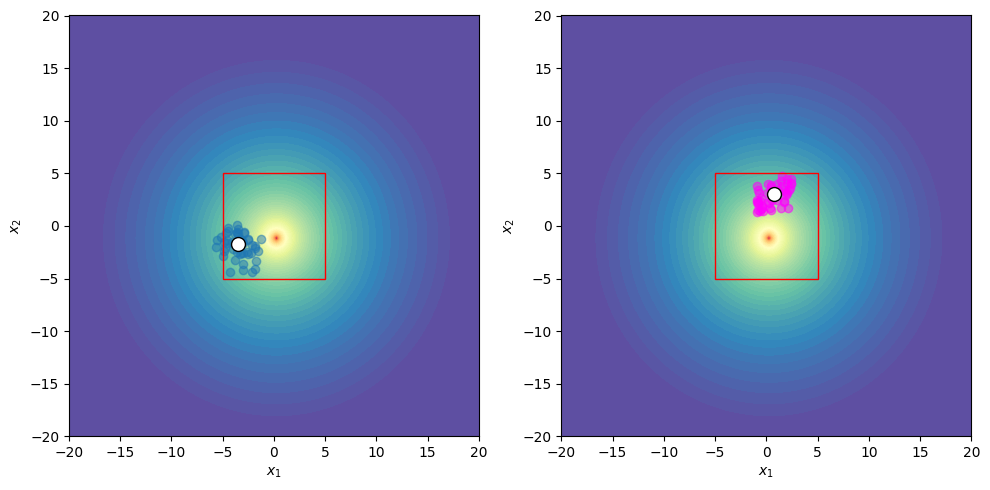

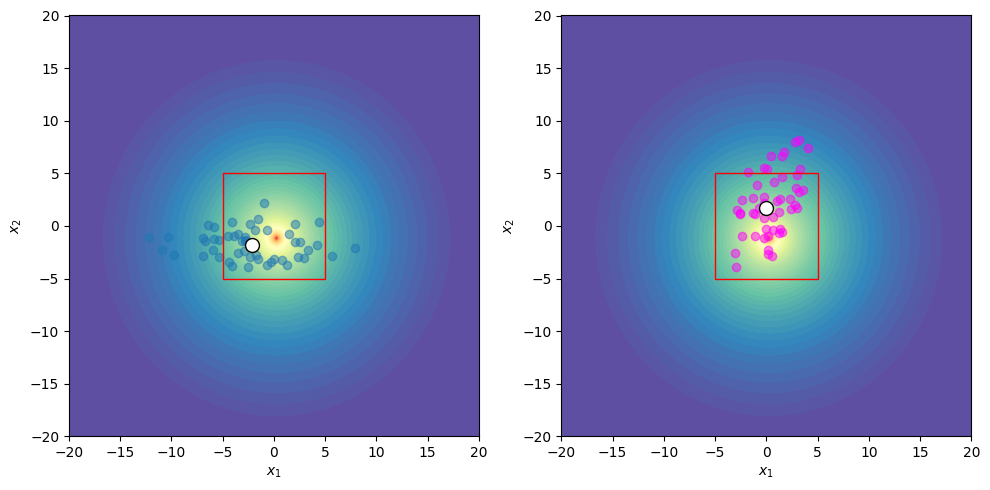

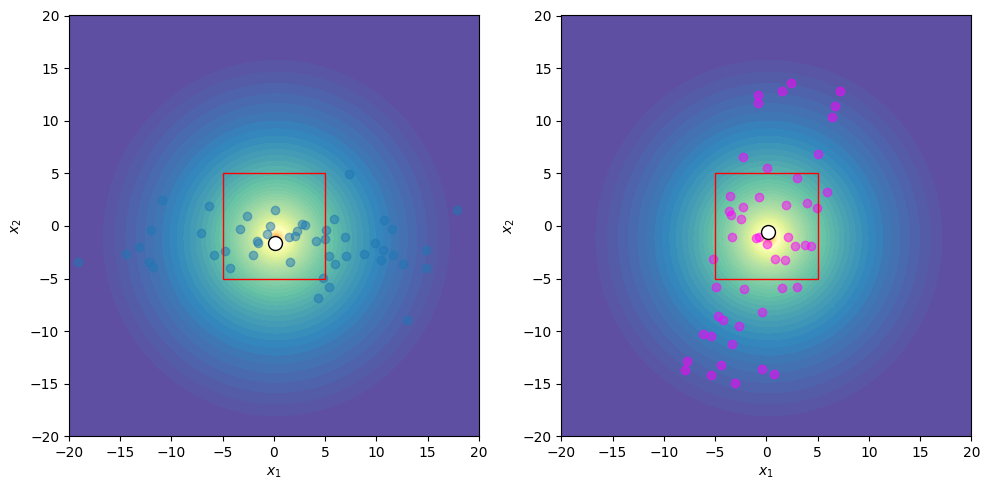

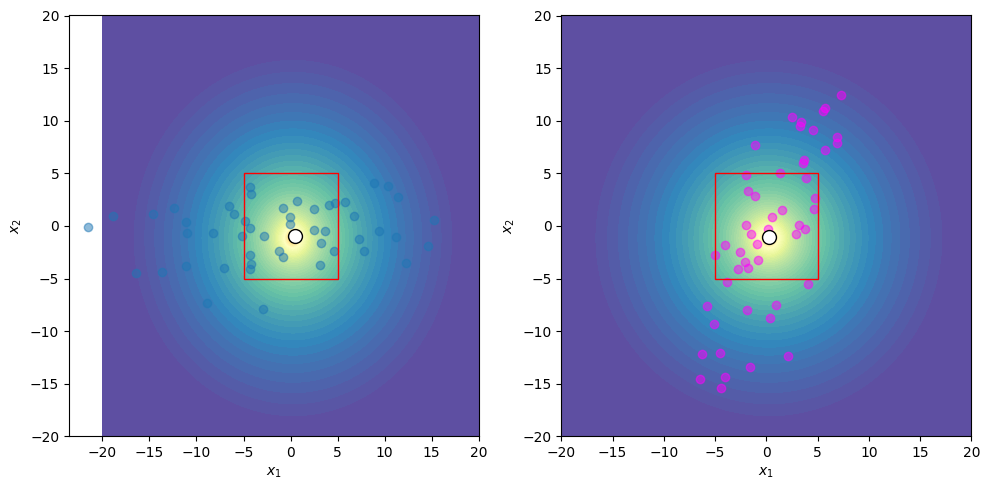

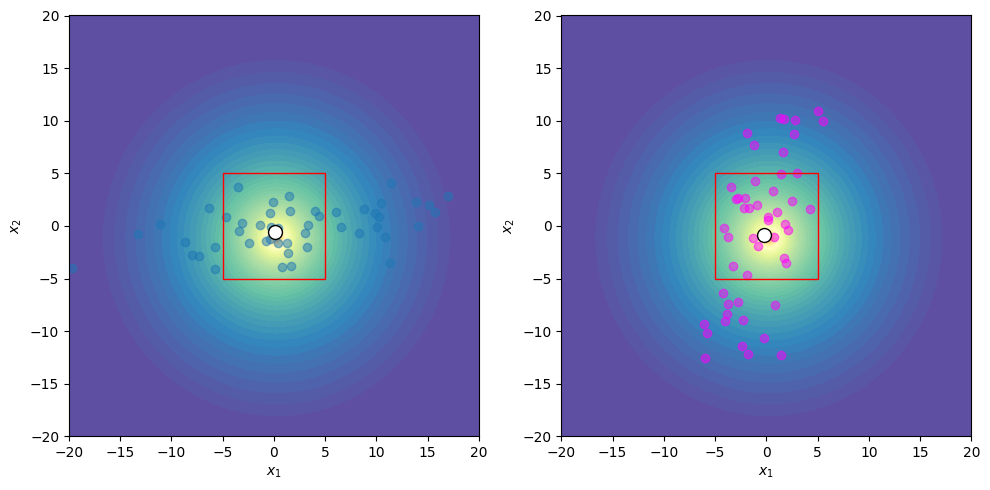

In [5]:
cma_norm = CholeskyCMAES()

cma_square = CholeskyCMAES(square=True)

cma_norm.restart(problem, 50, sigma0=1,)
cma_square.restart(problem, 50, sigma0=1,)

for _ in range(5):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    plot_contour(X, Y, Z, colorbar=False)
    plt.sca(ax1)
    plot_contour(X, Y, Z, colorbar=False)
    print(cma_norm.sigma, cma_square.sigma)
    print(cma_norm.A, cma_square.A)
    
    cma_norm.mutate(problem)
    cma_square.mutate(problem)

    ax1.scatter(cma_norm.X[0, :], cma_norm.X[1, :], alpha=.5)
    ax1.scatter(cma_norm.m[0, :], cma_norm.m[1, :], alpha=1, color='white', edgecolor='black', s=100)


    ax2.scatter(cma_square.X[0, :], cma_square.X[1, :], alpha=.5, color='magenta')
    ax2.scatter(cma_square.m[0, :], cma_square.m[1, :], alpha=1, color='white', edgecolor='black', s=100)

    rect1 = patches.Rectangle((-5, -5), 10, 10, linewidth=1, edgecolor='r', facecolor='none')
    rect2 = patches.Rectangle((-5, -5), 10, 10, linewidth=1, edgecolor='r', facecolor='none')

    ax1.add_patch(rect1)
    ax2.add_patch(rect2)
    
    cma_norm.adapt()
    cma_square.adapt()


KeyboardInterrupt: 

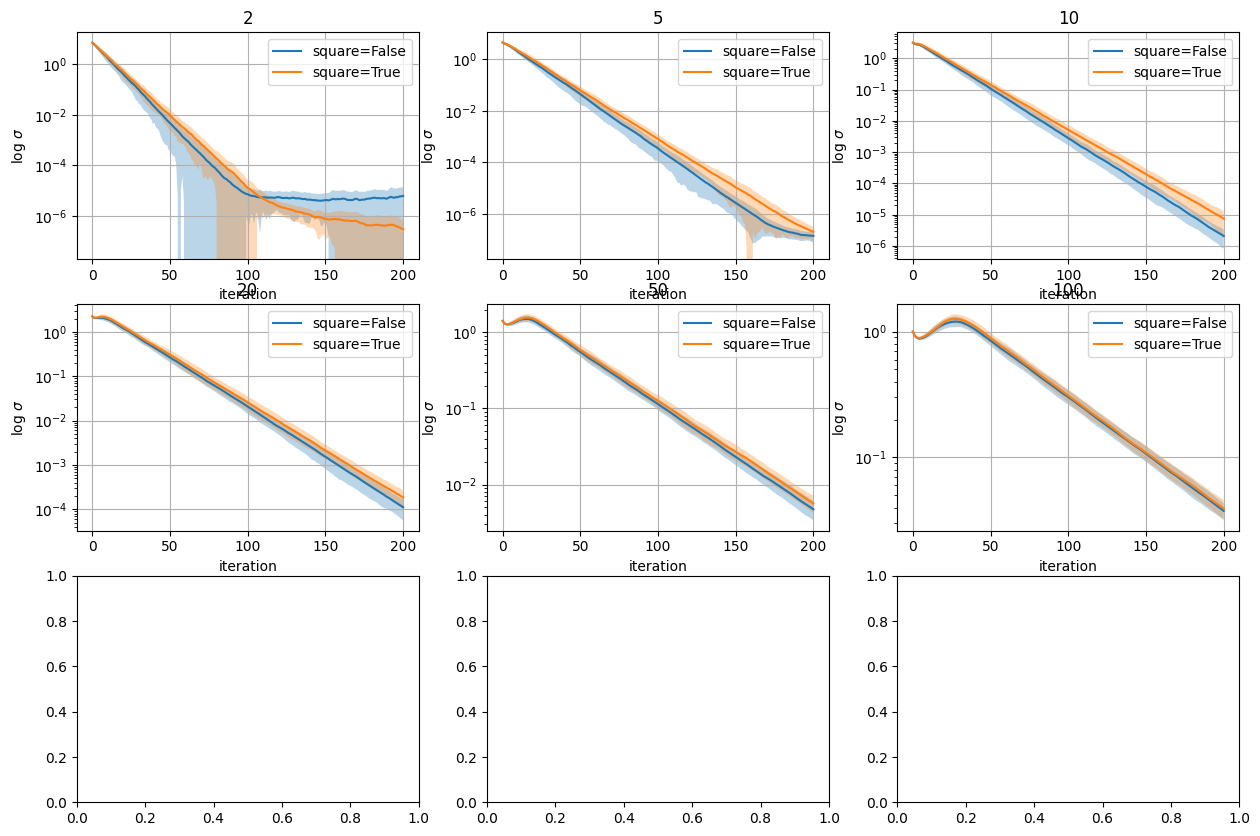

In [5]:
cma_norm = CholeskyCMAES()

cma_square = CholeskyCMAES(square=True)

f, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, dim in zip(axes.ravel(), (2, 5, 10, 20, 50, 100, 200, 500, 1000)):
    problem = ioh.get_problem(1, 1, dim)
    for cma in (cma_norm, cma_square):
        
        sigmases = []
        for r in range(50):
            cma.restart(problem)
            sigmas = [cma.sigma]
            for _ in range(200):
                cma.mutate(problem)
                cma.adapt()
                sigmas.append(cma.sigma)
                
            sigmases.append(sigmas)
        
        t = np.arange(len(sigmases[0]))
        mean = np.mean(sigmases, axis=0)
        std = np.std(sigmases, axis=0)
        ax.fill_between(t, mean-std, mean+std, alpha=.3)
        ax.semilogy(t, mean, label=str(cma)[-13:-1].strip())
    
    ax.set_title(dim)
    ax.grid()
    ax.legend()
    ax.set_ylabel(r"log $\sigma$")
    ax.set_xlabel(r"iteration")

plt.tight_layout()


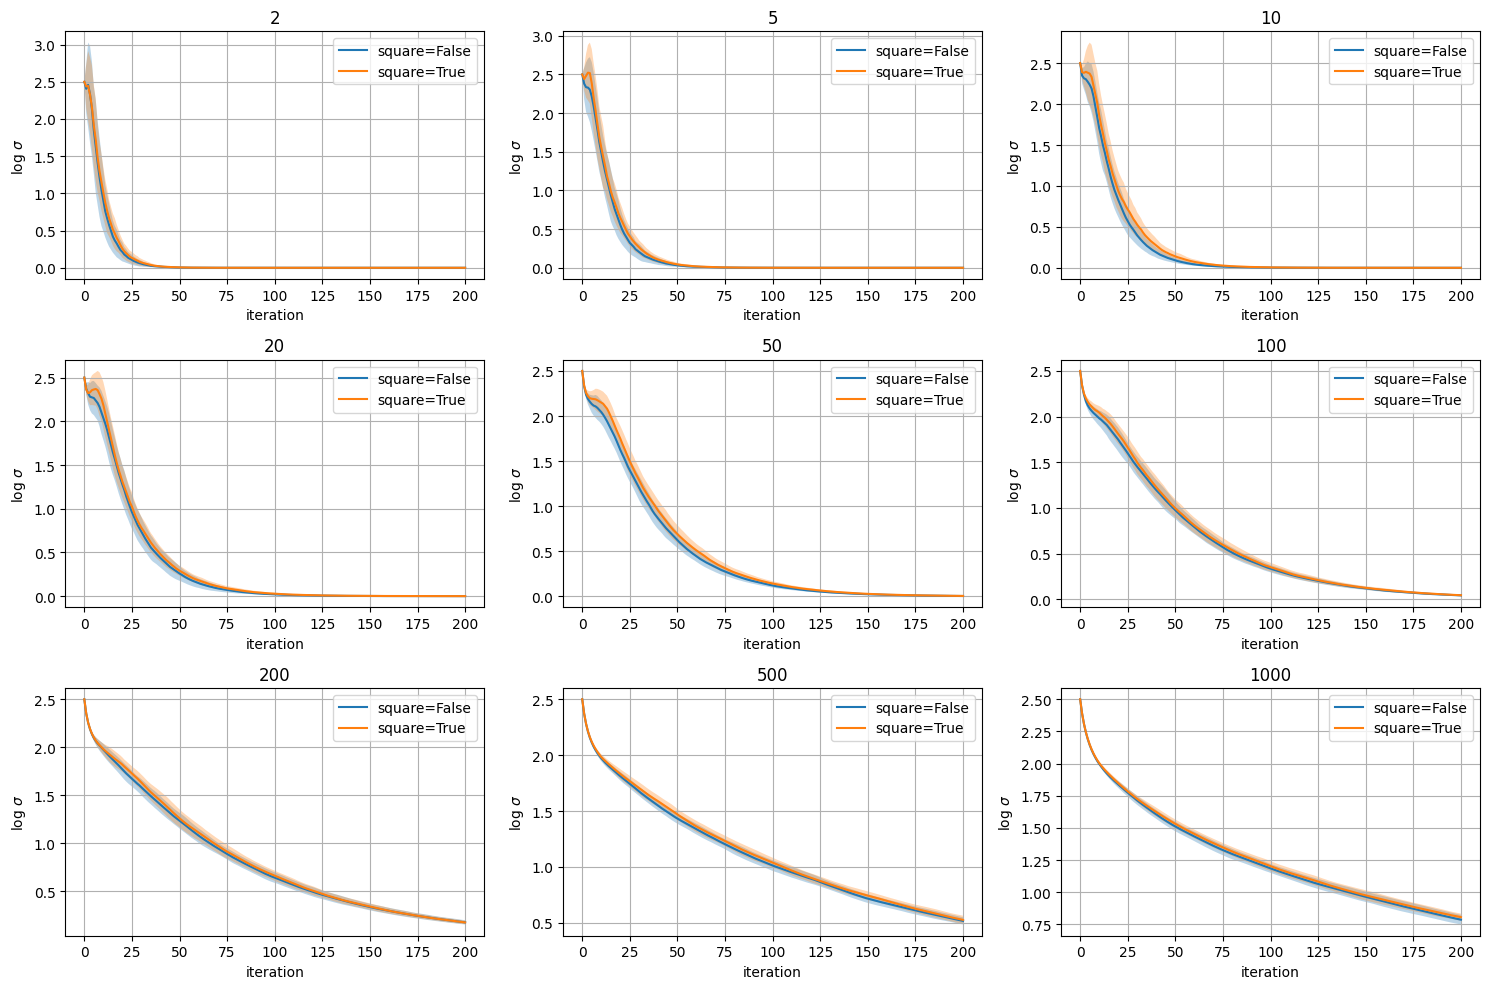

In [ ]:
cma_norm = CholeskyCMAES()

cma_square = CholeskyCMAES(square=True)

f, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, dim in zip(axes.ravel(), (2, 5, 10, 20, 50, 100, 200, 500, 1000)):
    problem = ioh.get_problem(1, 1, dim)
    for cma in (cma_norm, cma_square):
        
        sigmases = []
        for r in range(50):
            cma.restart(problem)
            sigmas = [cma.sigma]
            for _ in range(200):
                cma.mutate(problem)
                cma.adapt()
                sigmas.append(cma.sigma)
                
            sigmases.append(sigmas)
        
        t = np.arange(len(sigmases[0]))
        mean = np.mean(sigmases, axis=0)
        std = np.std(sigmases, axis=0)
        ax.fill_between(t, mean-std, mean+std, alpha=.3)
        ax.plot(t, mean, label=str(cma)[-13:-1].strip())
    
    ax.set_title(dim)
    ax.grid()
    ax.legend()
    ax.set_ylabel(r"log $\sigma$")
    ax.set_xlabel(r"iteration")

plt.tight_layout()

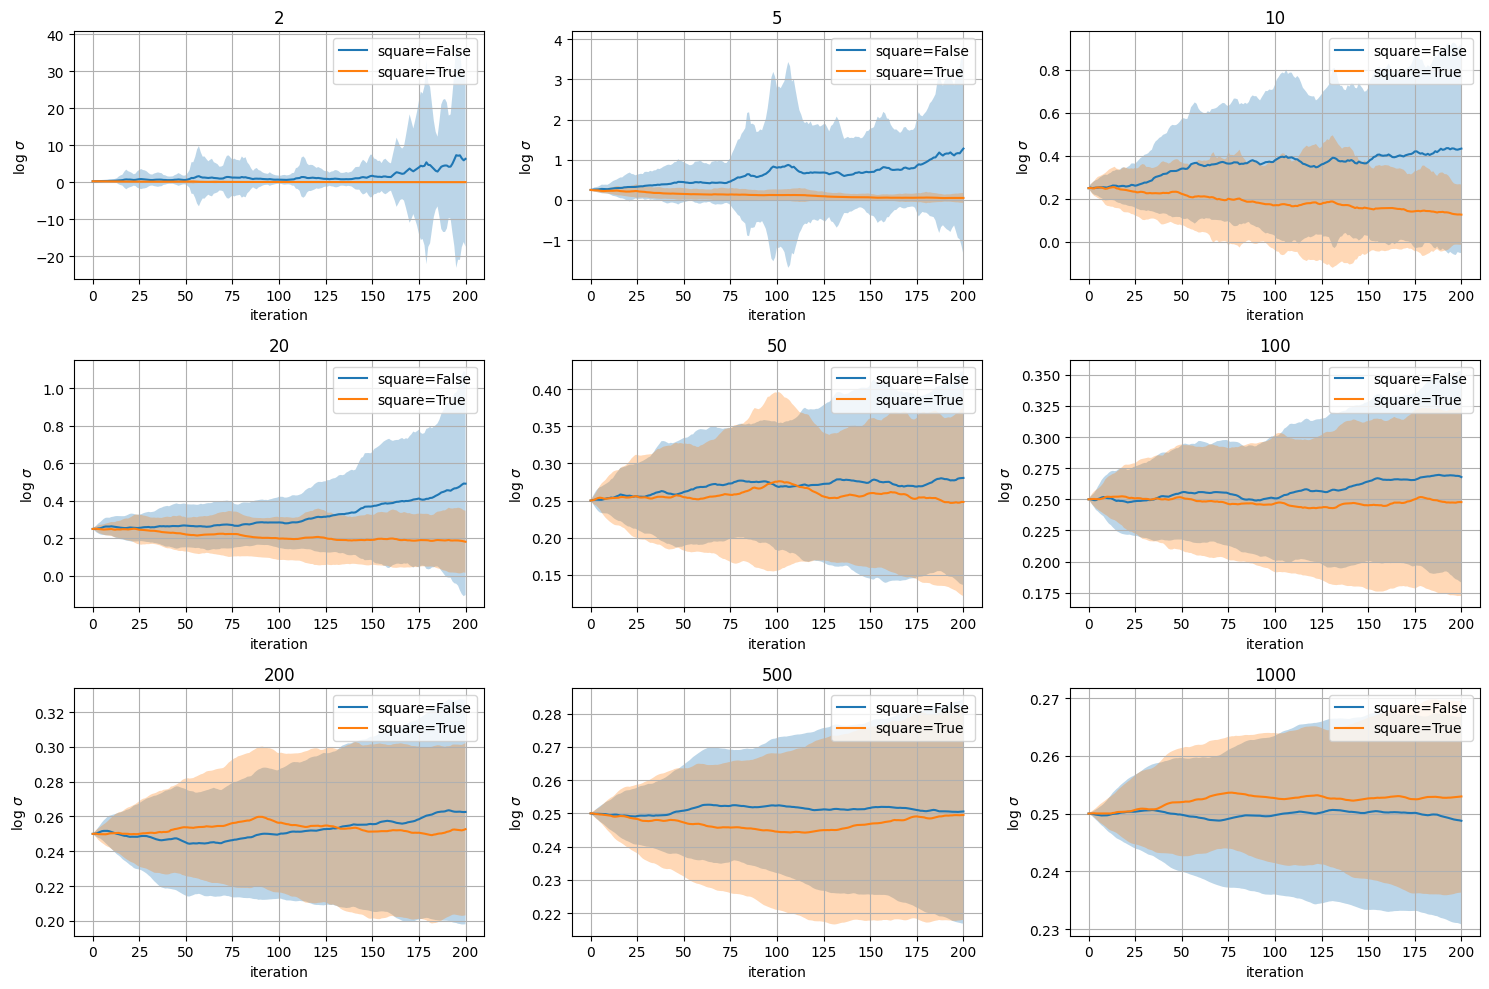

In [ ]:
cma_norm = CholeskyCMAES()

cma_square = CholeskyCMAES(square=True)

f, axes = plt.subplots(3, 3, figsize=(15, 10))

def rando(x):
    return np.random.uniform()

for ax, dim in zip(axes.ravel(), (2, 5, 10, 20, 50, 100, 200, 500, 1000)):
    # problem = ioh.get_problem(1, 1, dim)
    problem = ioh.wrap_problem(rando, name="f0", dimension=dim)
    for cma in (cma_norm, cma_square):
        
        sigmases = []
        for r in range(50):
            cma.restart(problem)
            sigmas = [cma.sigma]
            for _ in range(200):
                cma.mutate(problem)
                cma.adapt()
                sigmas.append(cma.sigma)
                
            sigmases.append(sigmas)
        
        t = np.arange(len(sigmases[0]))
        mean = np.mean(sigmases, axis=0)
        std = np.std(sigmases, axis=0)
        ax.fill_between(t, mean-std, mean+std, alpha=.3)
        ax.plot(t, mean, label=str(cma)[-13:-1].strip())
    
    ax.set_title(dim)
    ax.grid()
    ax.legend()
    ax.set_ylabel(r"log $\sigma$")
    ax.set_xlabel(r"iteration")

plt.tight_layout()

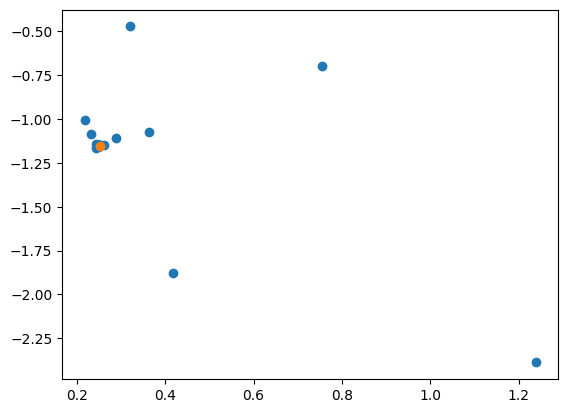

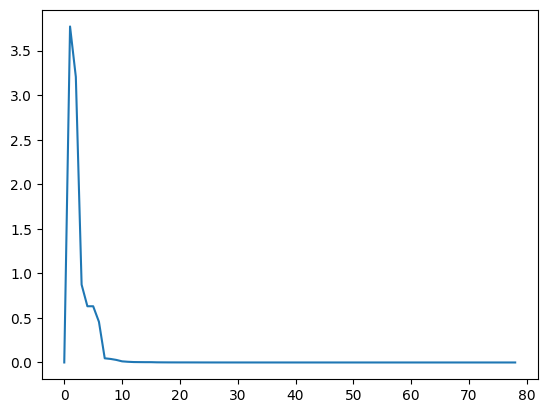

In [17]:
import pandas as pd
bad_run = pd.read_csv("../data/bad_run.csv", sep=' ')

p = ioh.get_problem(1, 1, 2)
plt.scatter(bad_run.x0, bad_run.x1)
plt.scatter(p.optimum.x[0], p.optimum.x[1])

plt.figure()
plt.plot(bad_run.sigma)



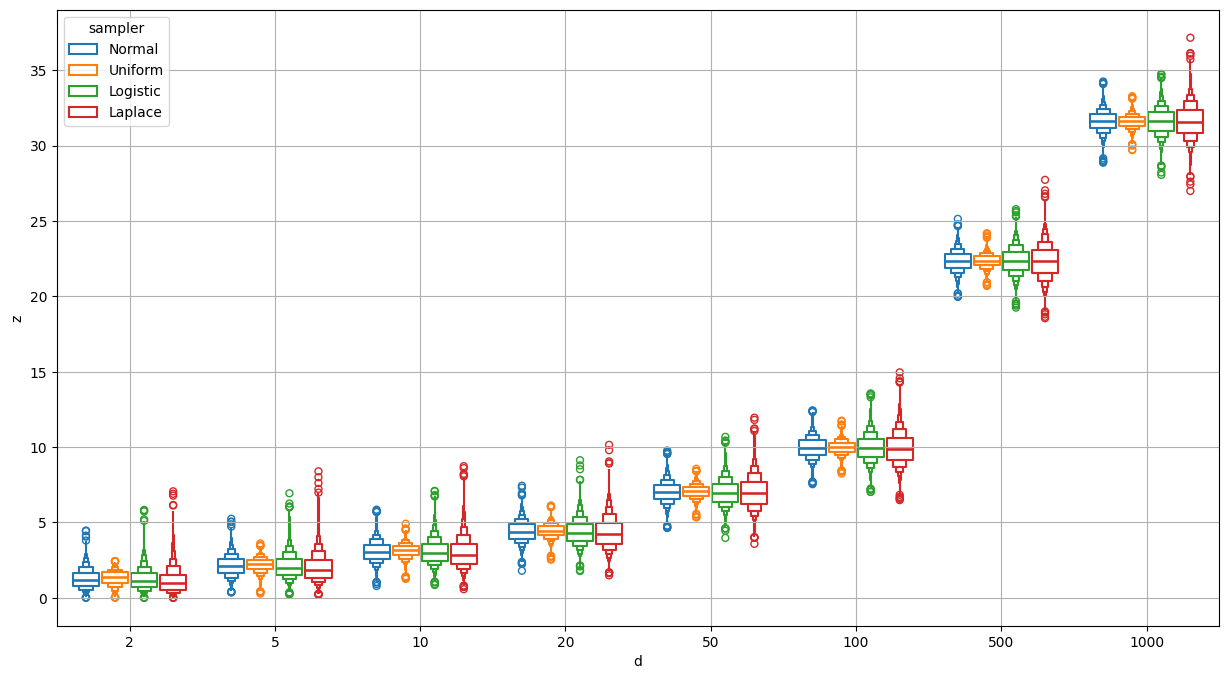

In [8]:
from algorithms.sampling import *
from matplotlib.lines import Line2D
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

n_samples = 10000

records = []
for i, (color, sampler) in enumerate(zip("rbym", (Normal(), Uniform(), Logistic(), Laplace()))):
    for d in (2, 5, 10, 20, 50, 100, 500, 1000):
        samples = [(sampler.__class__.__name__, d, np.linalg.norm(sampler(d))) for _ in range(n_samples)]
        records.extend(samples)

data = pd.DataFrame(records, columns = ["sampler", "d", "z"])
plt.figure(figsize=(15, 8))
sns.boxenplot(data, x="d", hue="sampler", y="z", fill=False, gap=.1)
plt.grid()


In [3]:
sns.boxplot(data=data, x="d", y="z", fill=False, gap=.1, showfliers=False)

KeyboardInterrupt: 

: 

: 

In [1]:
data

NameError: name 'data' is not defined